# Stat 301 Final Report
### Group 8 (Yiting Sun, Jiahao Li, Jorge Punter Piquer, Devyn Connolly)

## Introduction

Understanding the factors that influence higher income is essential for examining social mobility, economic opportunities, and inequality. Income-related disparities have been a key focus in socio-economic research. Kochhar and Moslimani (2021) highlight the persistent wealth inequalities in the United States, reporting that Asian and White households hold significantly more wealth than Black and Hispanic households, primarily due to differences in educational attainment and systemic inequities. Similarly, Ahrenfeldt et al. (2020) underscore the importance of income stability, demonstrating that lower and declining incomes are strongly linked to increased health risks and higher mortality rates, especially among men. Notably, income levels during an individual’s late 50s have been identified as a critical predictor of health outcomes later in life.

This project investigates the research question: What are the key factors that best predict whether an individual’s annual income exceeds $50,000 in 1994, and how effectively can these variables be used in a predictive model? To address this question, we use the "Adult Income" dataset from the UCI Machine Learning Repository. Rather than relying on manually selected variables, we employ LASSO regression to systematically identify the most relevant predictors from a diverse set of features, including age, education level, work hours, marital status, and occupation. This data-driven approach allows us to construct a predictive model that not only answers our research question but also provides insights into the complex relationships between these variables and income levels.

#### Data Description:

The Census Income dataset, also known as the "Adult" dataset, is derived from the 1994 US Census by Barry Becker. The dataset investigates whether annual income of an individual exceeds $\$50,000$ per year based on census data. It contains 48,842 observations and 14 features. The target variable (response) is whether the individual's income is more than $\$50,000 $ or not, and the predictor variables include a variety of demographic and socio-economic attributes including age, workclass, fnlwgt, education, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native countries. 

#### Explanatory Variables (14):
- `age`: (Integer) - continuous 
- `workclass`: (Categorical) - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- `fnlwgt`: (Integer) - continuous
- `education`: (Categorical) - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- `education-num`: (Integer) - continuous
- `marital-status`: (Categorical) - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
- `occupation`: (Categorical) - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
- `relationship`: (Categorical) - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
- `race`: (Categorical) - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- `sex`: (Binary) - Female, Male
- `capital-gain`: (Integer) - continuous
- `capital-loss`: (Integer) - continuous
- `hours-per-week`: (Integer) - continuous
- `native-country`: (Categorical) - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
  
#### Reponse Variable:
- `income`: (Binary: >50k, <=50k)

## Methods and Results

### a) Exploratory Data Analysis (EDA)

#### Reading Our Dataset

Importing the libraries that may be needed for our project.

In [ ]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(car)
library(GGally)
library(forcats)
library(tidyverse)
library(repr)
library(infer)
library(gridExtra)
library(caret)
library(pROC)
library(boot)
library(glmnet)
library(leaps)

## Exploratory Data Analysis and Visualization

We will begin by downloading the data, taking into account that the missing values are coded as '?'. Additionally, we will change the strings to factors for ease. The data comes split already into a train and test file.

In [ ]:
#Main Developer: Jorge Punter Piquer
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/2/adult.zip",temp)
adult_train <- read.table(unz(temp, "adult.data"),sep=",",na.strings=' ?',stringsAsFactors=TRUE)
adult_test <- read.table(unz(temp, "adult.test"),sep=",",na.strings=' ?',stringsAsFactors=TRUE,skip=1)
unlink(temp)

We will manually input the column names.

In [3]:
#Main Developer: Jorge Punter Piquer
#Contributer: Devyn Connolly, Yiting Sun
colnames(adult_train) = c("age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income")
colnames(adult_test) = c("age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income")

head(adult_train, 3)
tail(adult_train, 3)
head(adult_test, 3)
tail(adult_test, 3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
16279,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16280,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16281,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


We can use the summary() and str() functions to look at some summary information about our dataset.

In [4]:
#Main Developer: Jorge Punter Piquer
#Contributer: Devyn Connolly
summary(adult_train)
str(adult_train)

      age                    workclass         fnlwgt       
 Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :38.58    State-gov       : 1298   Mean   : 189778  
 3rd Qu.:48.00    Self-emp-inc    : 1116   3rd Qu.: 237051  
 Max.   :90.00   (Other)          :  981   Max.   :1484705  
                 NA's             : 1836                    
         education     education_num                  marital_status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.00    Never-married        :10683  
  11th        : 1175   Max.   :16.00    Separated            : 1025  
 (Other)      : 5134  

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels " Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  4

From these tables, we can examine the structure and makeup of each column. Firstly, there is a large class imbalance in our target variable: `income`. Similarly, in our `Sex` variable, we can see there are twice as many men as women in our data. This can certainly affect future modelling. We also see that `native_country` has many levels, and it also has missing variables, so we will drop this variable for our study. We also see that the 75 % of the values of `capital_gain` and `capital_loss` are 0, so we will drop those variables also. Additionally, the `workclass` and `occupation` have many missing values, but instead of removing the variables, and their potential predictive influence, we will simply remove the observations with missing values.

In [5]:
#Main Developer: Jorge Punter Piquer
adult_train = adult_train %>% select(!c(capital_gain,capital_loss,native_country))
adult_test = adult_test%>% select(!c(capital_gain,capital_loss,native_country))
adult_train = adult_train[complete.cases(adult_train),]
adult_test = adult_test[complete.cases(adult_test),]

head(adult_train)
n = nrow(adult_train)
n
nrow(adult_test)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K


[1] 30718

[1] 15315

We have 30718 instances in the train split and 15315 in the test split. This is approximately a 67%-33% split.

In [6]:
str(adult_train)

'data.frame':	30718 obs. of  12 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels " Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ income        : Factor w/ 2 levels " <=50K"," >50K": 1 1 1 1 1 1 1 2 2

We will now present some visualizations for each of our variables, with the class distribution of our target.

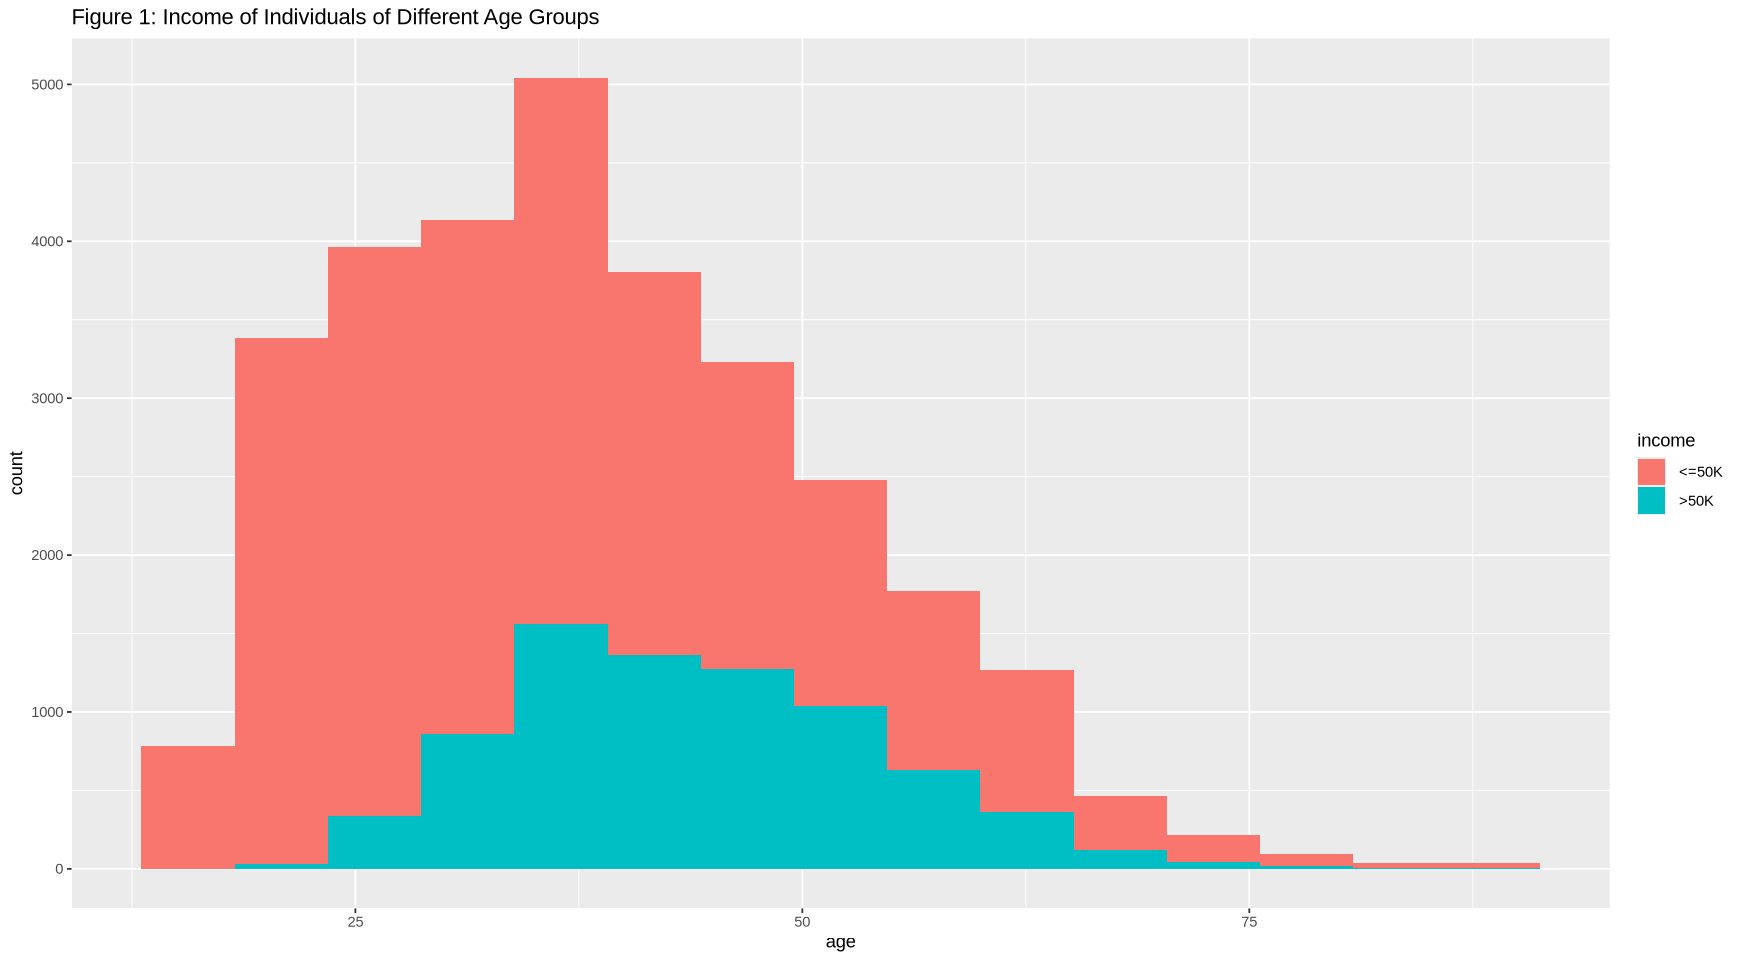

In [7]:
#Main Developer: Jorge Punter Piquer
options(repr.plot.width = 14.5, repr.plot.height = 8) 
ggplot(adult_train,aes(age,fill=income))+
geom_histogram(bins=15)+ 
ggtitle("Figure 1: Income of Individuals of Different Age Groups")

We see that the proportion of people with an income greater than $50k is very low for people of less than approximately 30 years old. Additionally, the propotion of those earning more than 50k remains fairly consistent through all age groups greater than approximately 45 years old.

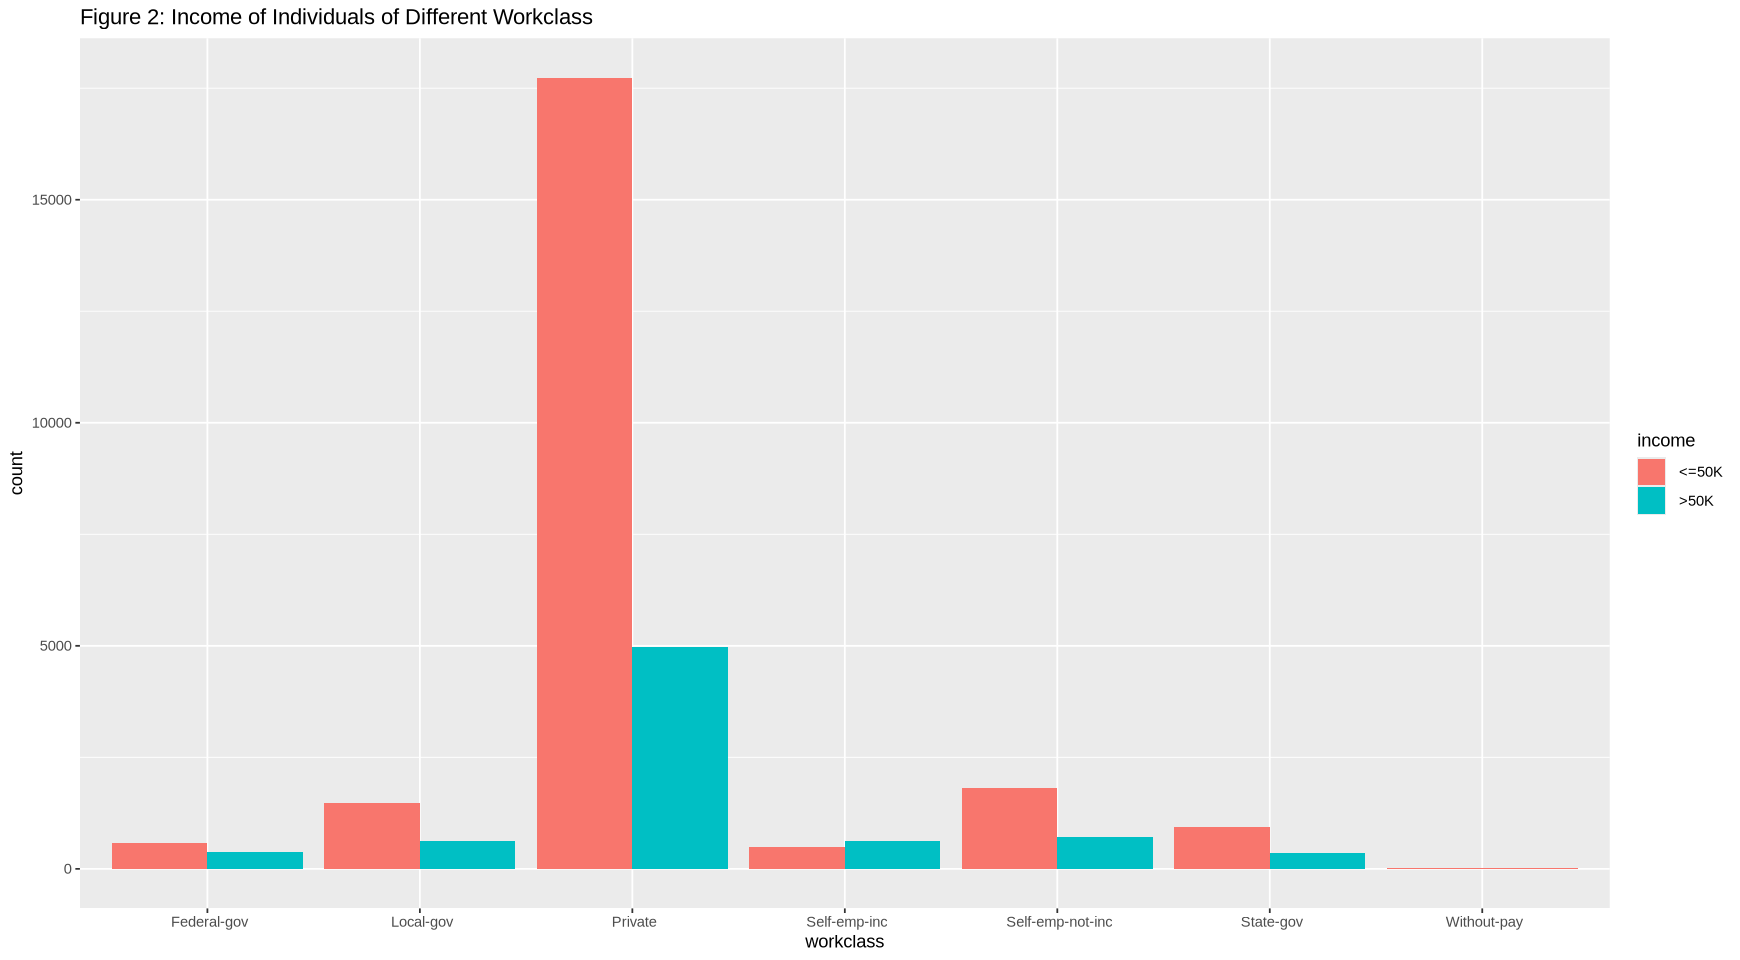

In [8]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(workclass,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 2: Income of Individuals of Different Workclass")

We clearly see that the majority of people work in `Private` and there is a big difference in income in that category, where nearly 0.25% earns more than \$50K. We also see that `Self-emply-inc` is the only factor with more people earning more than $50K a year than those who not

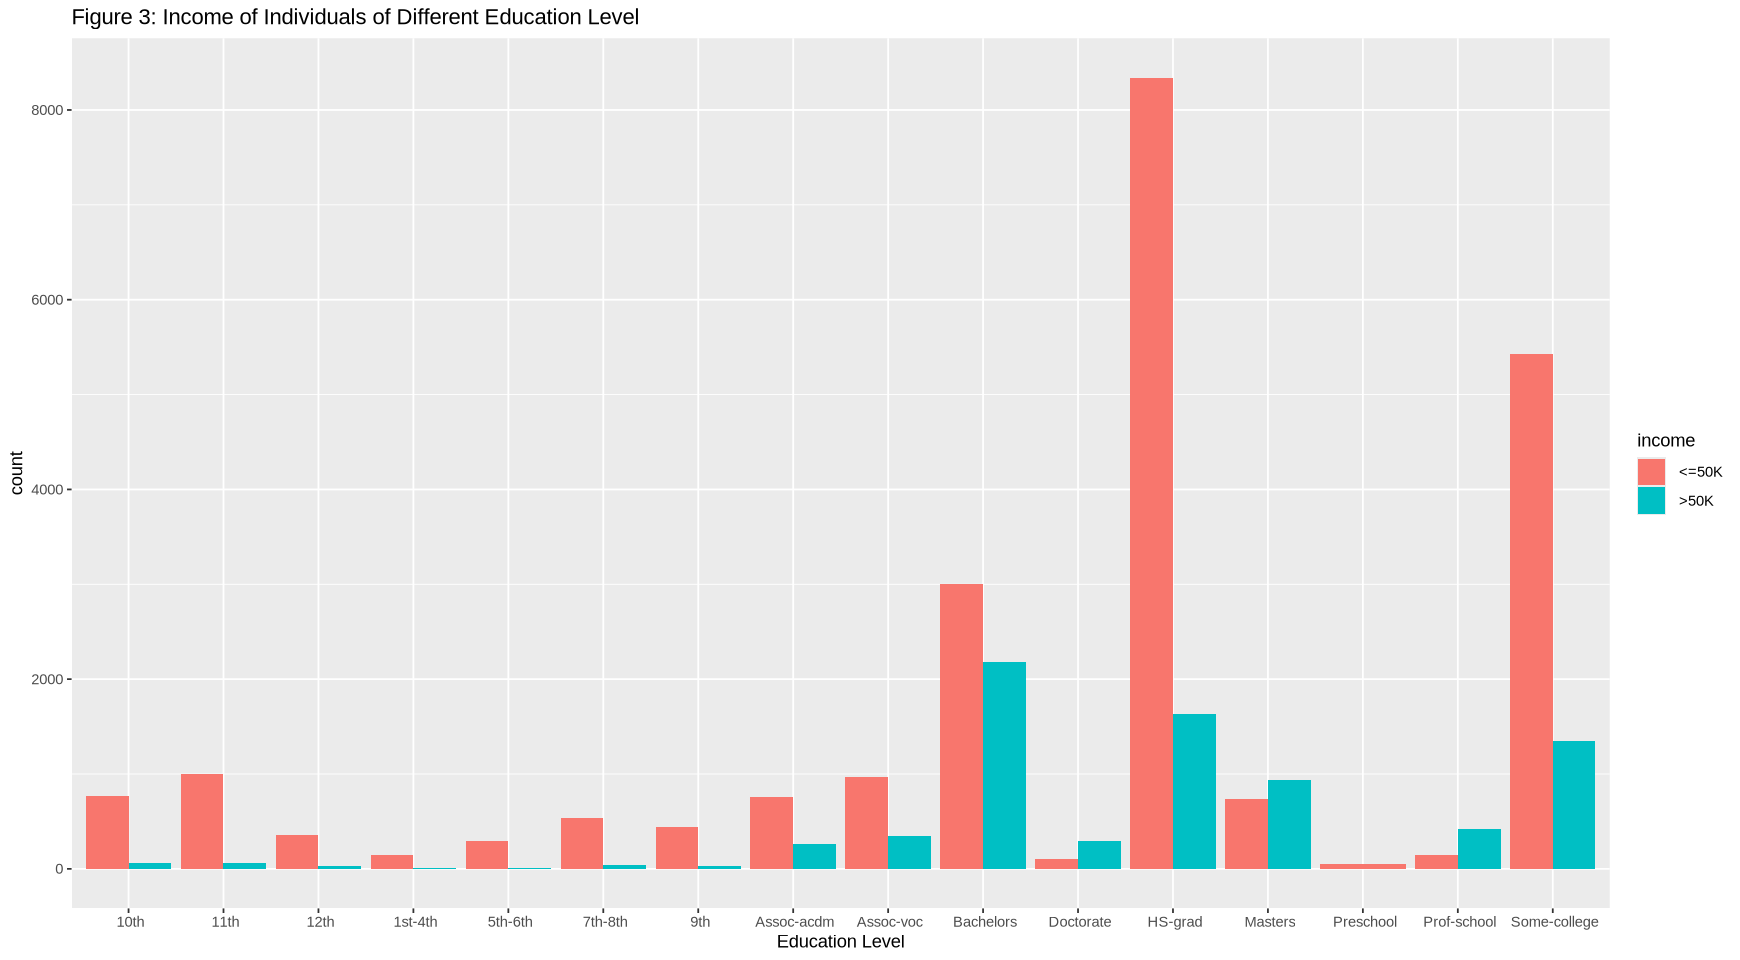

In [9]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(education,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 3: Income of Individuals of Different Education Level")+
xlab("Education Level")

For the people who have a lower or equal education level than 12th Standard, there are very few who earn more than 50K dollars per year.
Most people have either `HS-grad`, `Bachelors` or `Some-college`, and in each there are significantly more who earn less than 50k. For the people belonging to `Masters`, `Doctorate` and `Prof-school` category in the education level, there are more people who are earning more than 50K dollars per year than the number of people earning less.

Due to the similarity of the target class distribution in the levels between 1st-4th and 12th grade, we will join them to reduce the number of levels in our study.

In [10]:
#Main Developer: Jorge Punter Piquer
adult_train$education = fct_collapse(adult_train$education, 
                                   less12th = c(" Preschool"," 1st-4th"," 5th-6th"," 7th-8th", " 9th"," 10th", " 11th", " 12th"))
adult_test$education = fct_collapse(adult_test$education, 
                                  less12th = c(" Preschool"," 1st-4th"," 5th-6th"," 7th-8th", " 9th"," 10th", " 11th", " 12th"))

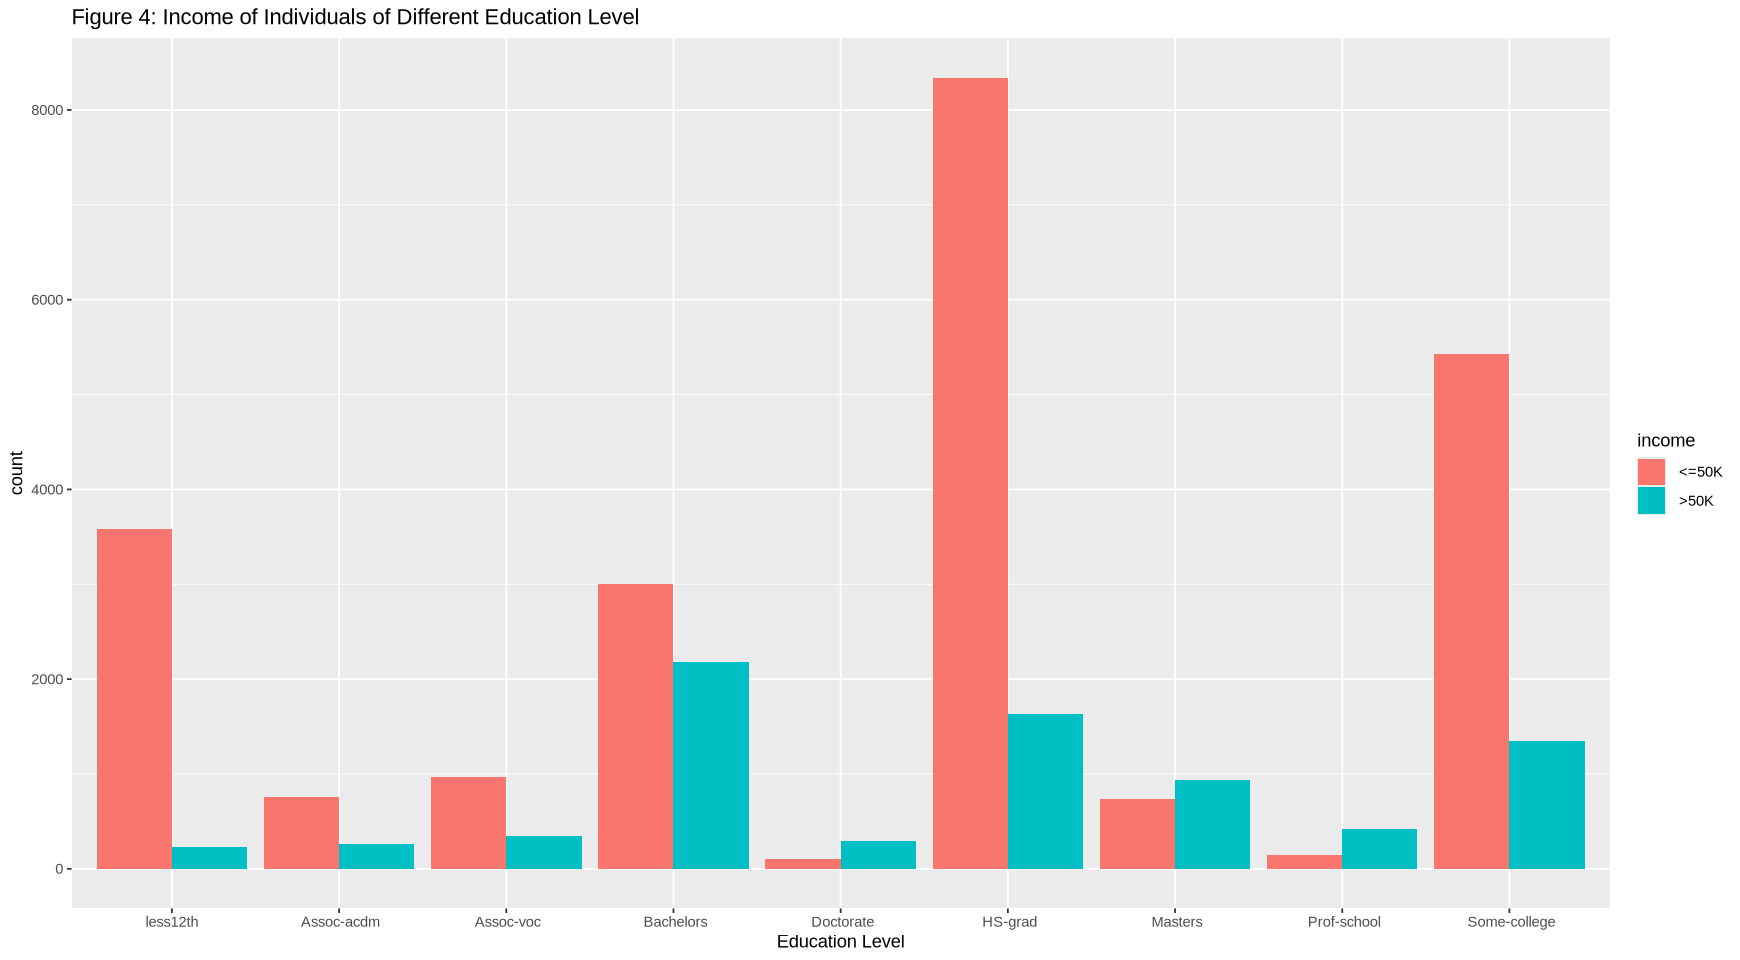

In [11]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(education,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 4: Income of Individuals of Different Education Level")+
xlab("Education Level")

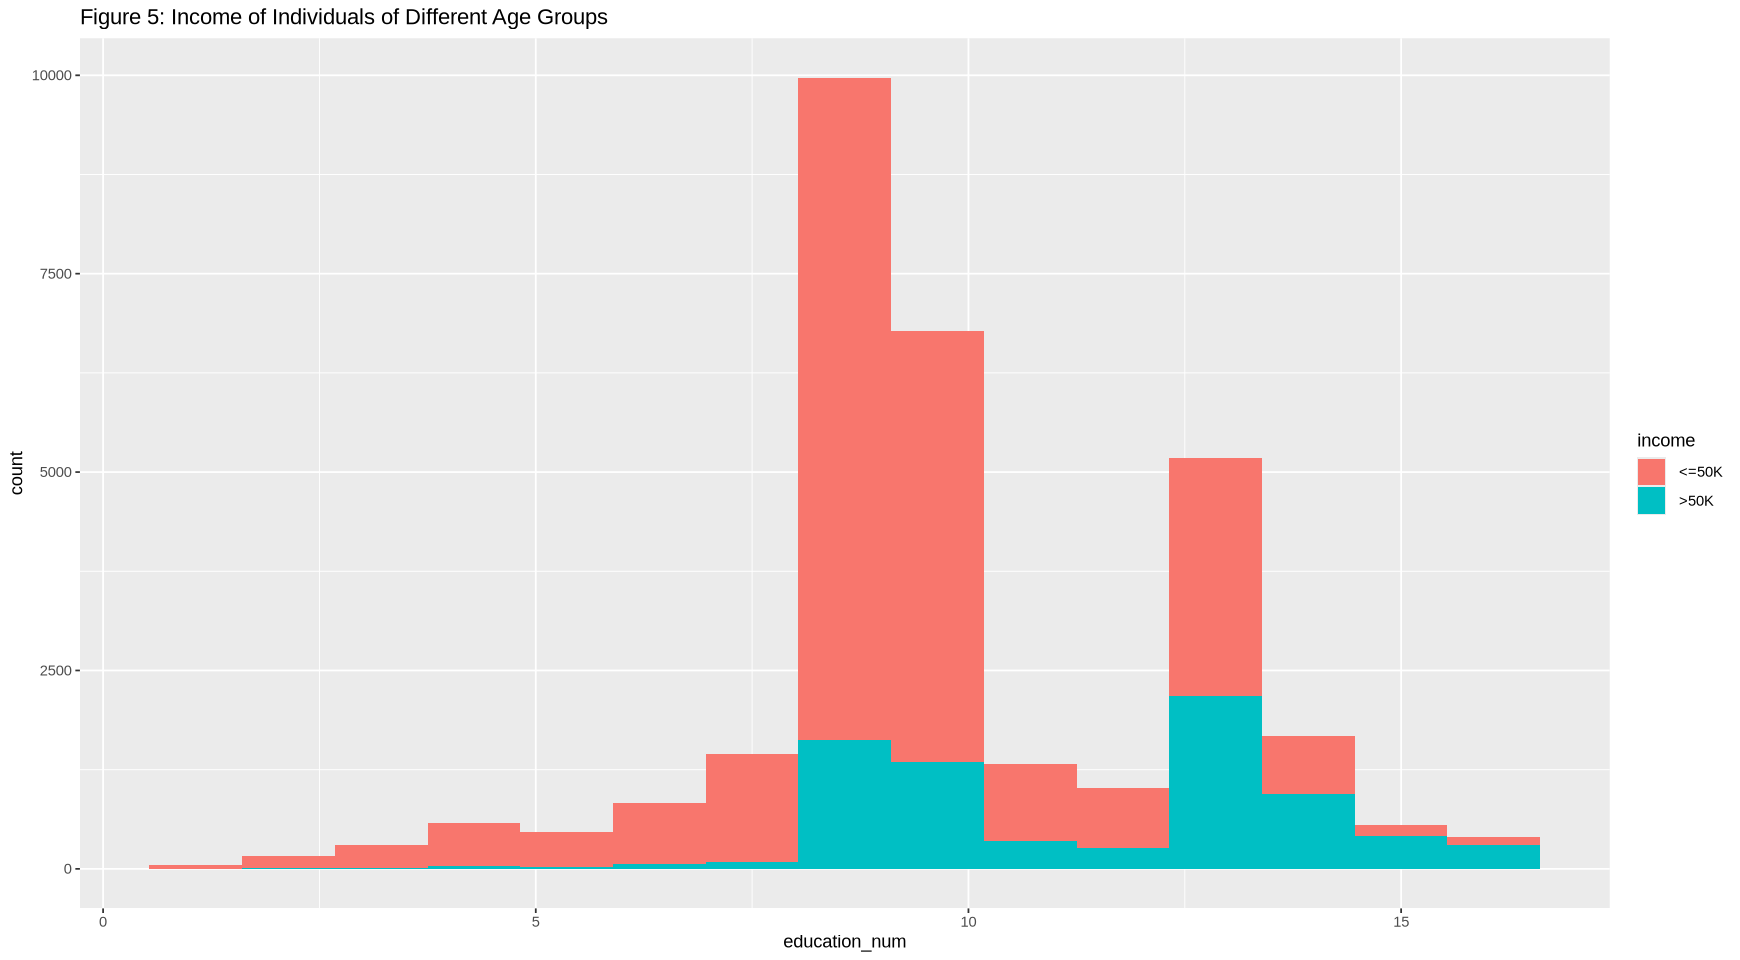

In [12]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(education_num,fill=income))+
geom_histogram(bins=15)+ 
ggtitle("Figure 5: Income of Individuals of Different Age Groups")

There are higher proportions of high earners in education numbers greater than 13. There are very few high earners in numbers below 8.

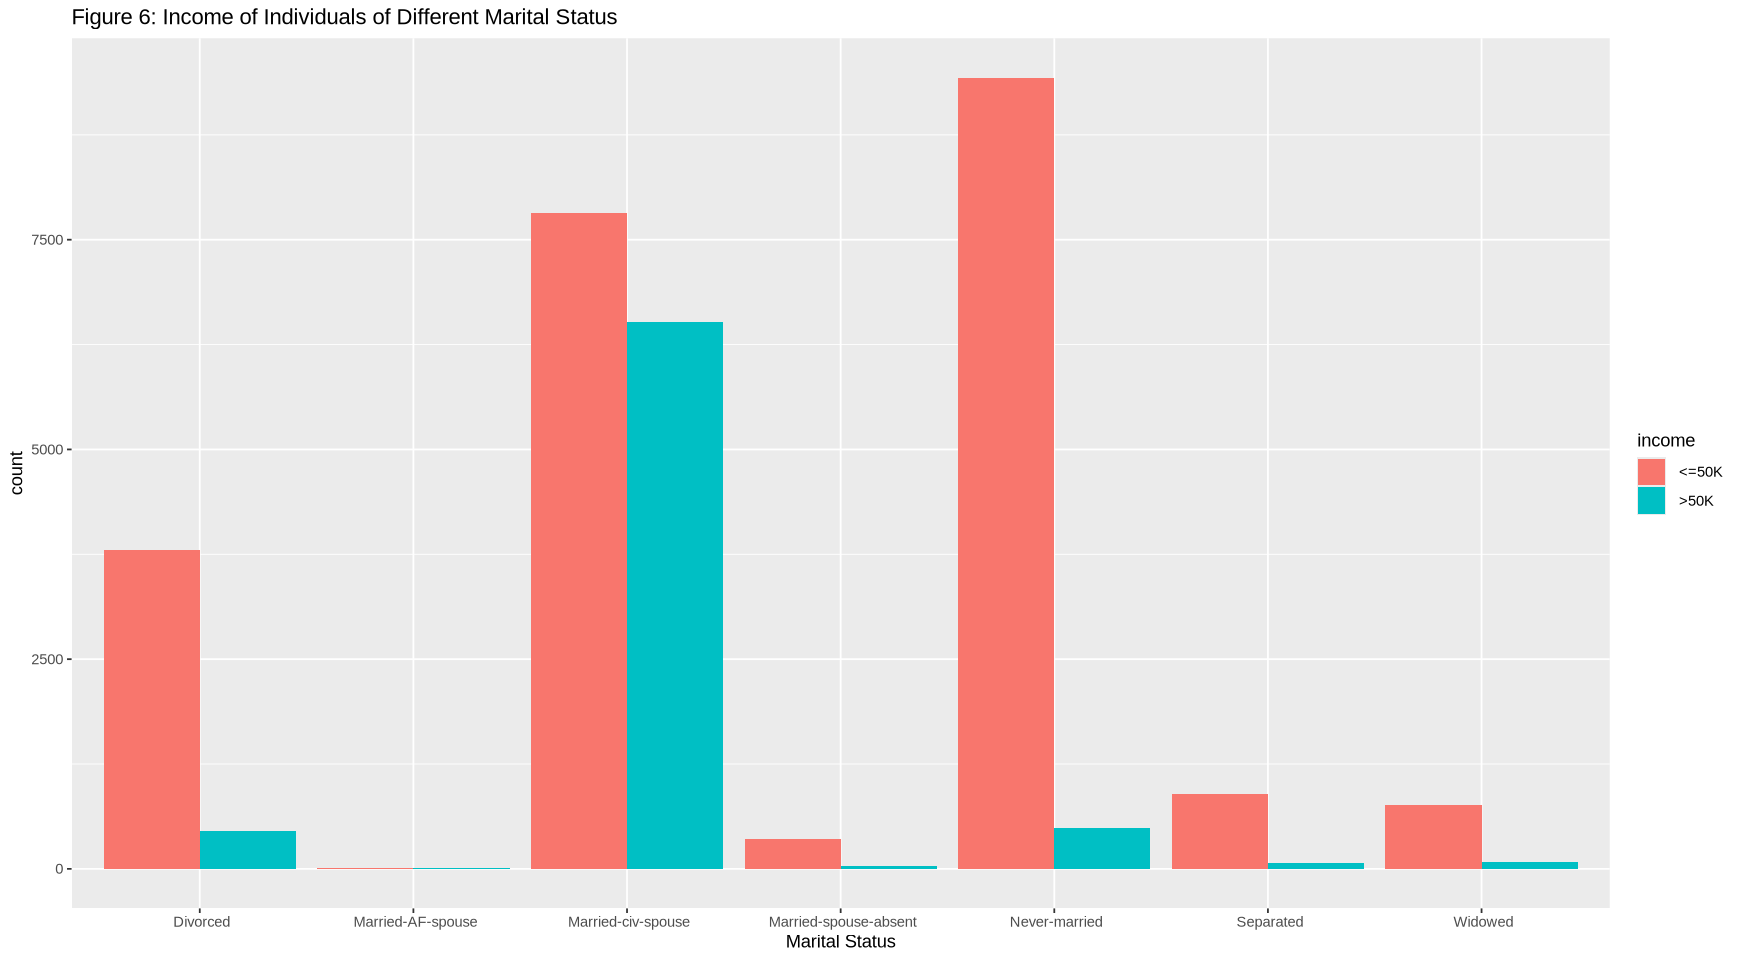

In [13]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(marital_status,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 6: Income of Individuals of Different Marital Status")+
xlab("Marital Status")

In [14]:
levels(adult_train$income)

[1] " <=50K" " >50K"

We see that `Married-civ-spouse` is the only category which has a comparable number of people belonging to both categories.
For the other categories, there are less than 25% of the adults earning more than 50K dollars an year.

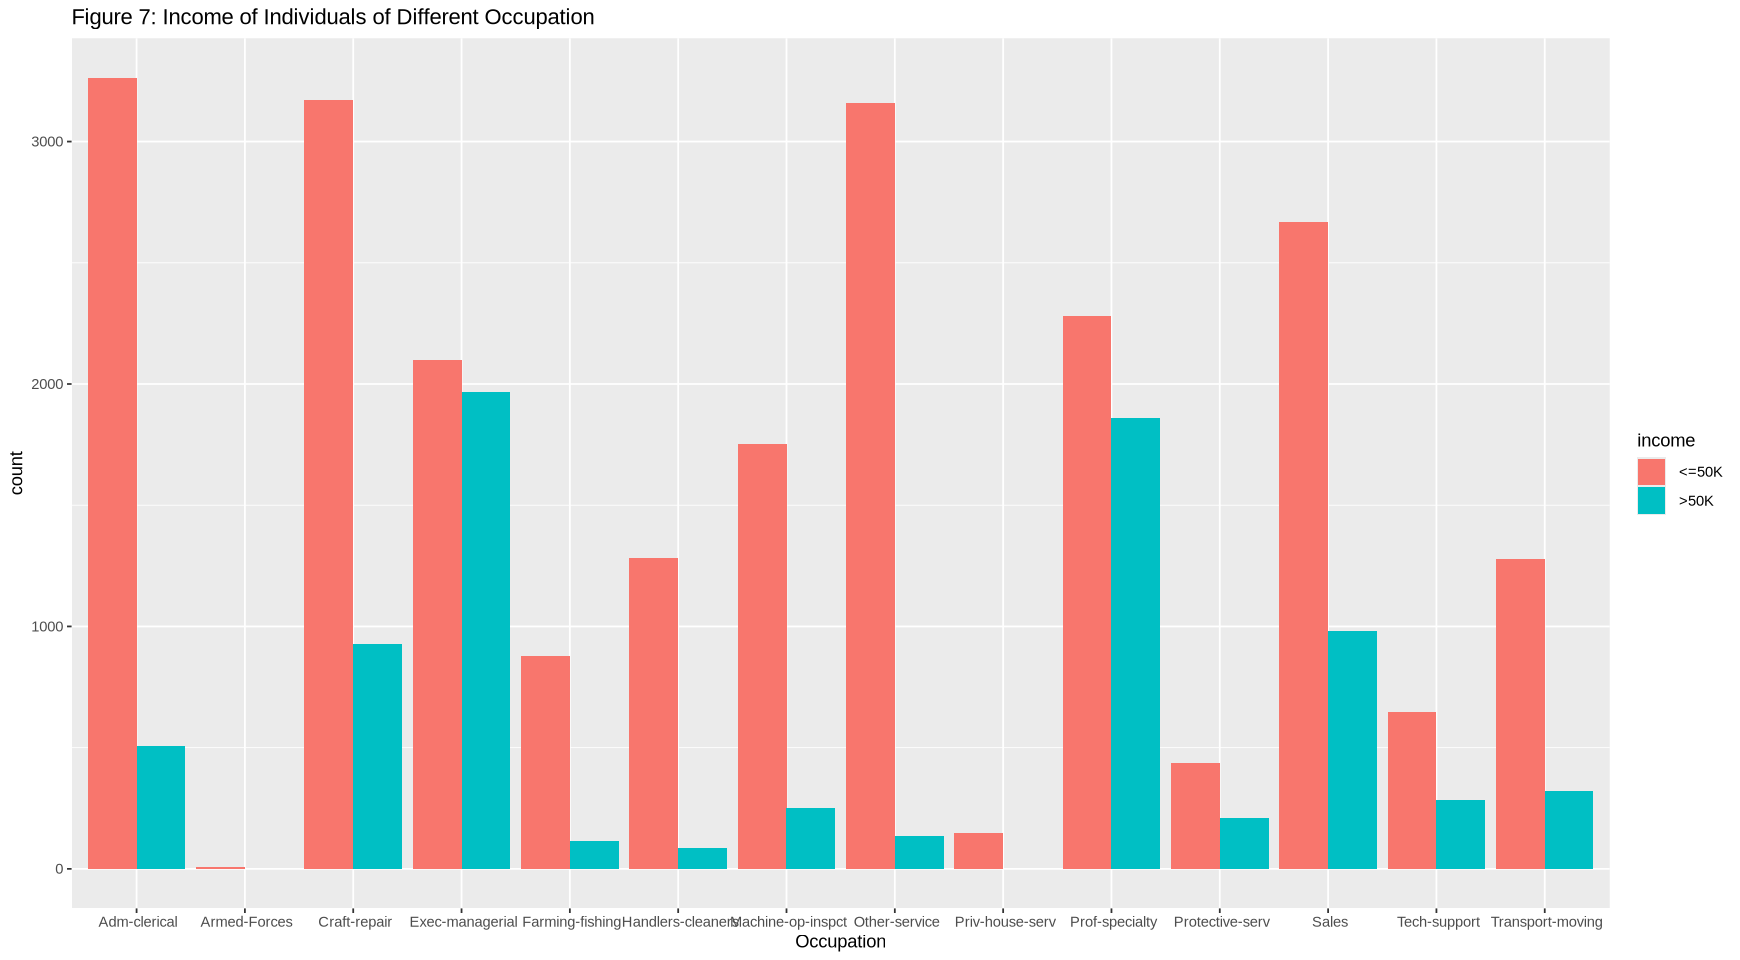

In [15]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(occupation,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 7: Income of Individuals of Different Occupation")+
xlab("Occupation")

We see that people in `Exec-managerial` roles are equally likely to earn more than 50K dollars per year.
There is close to a 33% probablity for a person in `Prof-specialty` to earn more than 50K dollars per year.
Only a few people working in `Farming-fishing`, `Machine-op-inspect`, `Other-service`, `Adm-clerical`, `Transport-moving` earn more than 50K dollars per year.
Around 25% of the people working in `Sales` earn more than 50K dollars an year.

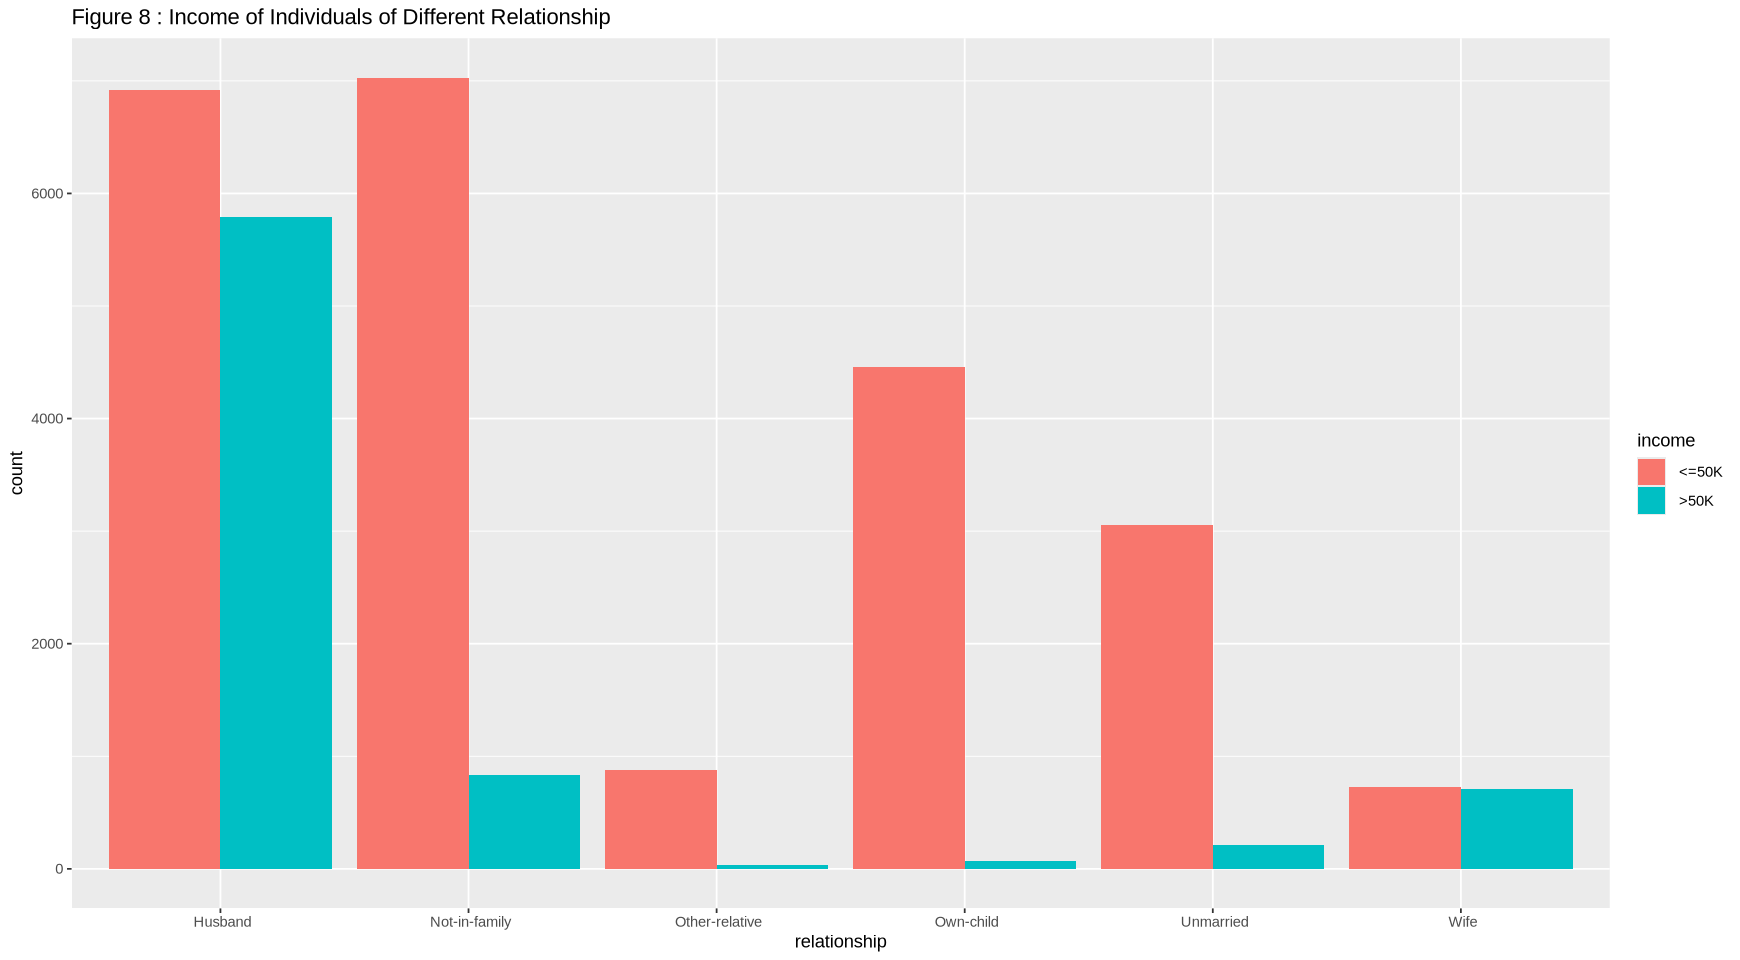

In [16]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(relationship,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 8 : Income of Individuals of Different Relationship")

We see that there is a more or less an equal quantity of `Wives` that earn more than 50K dollars per year than those who does not.
For `Husbands`, although significant, there is less possibility of them to earn more than 50K dollars an year.
There are just a few of `Unmarried` and `Own-child` people earning more than 50K dollars an year.

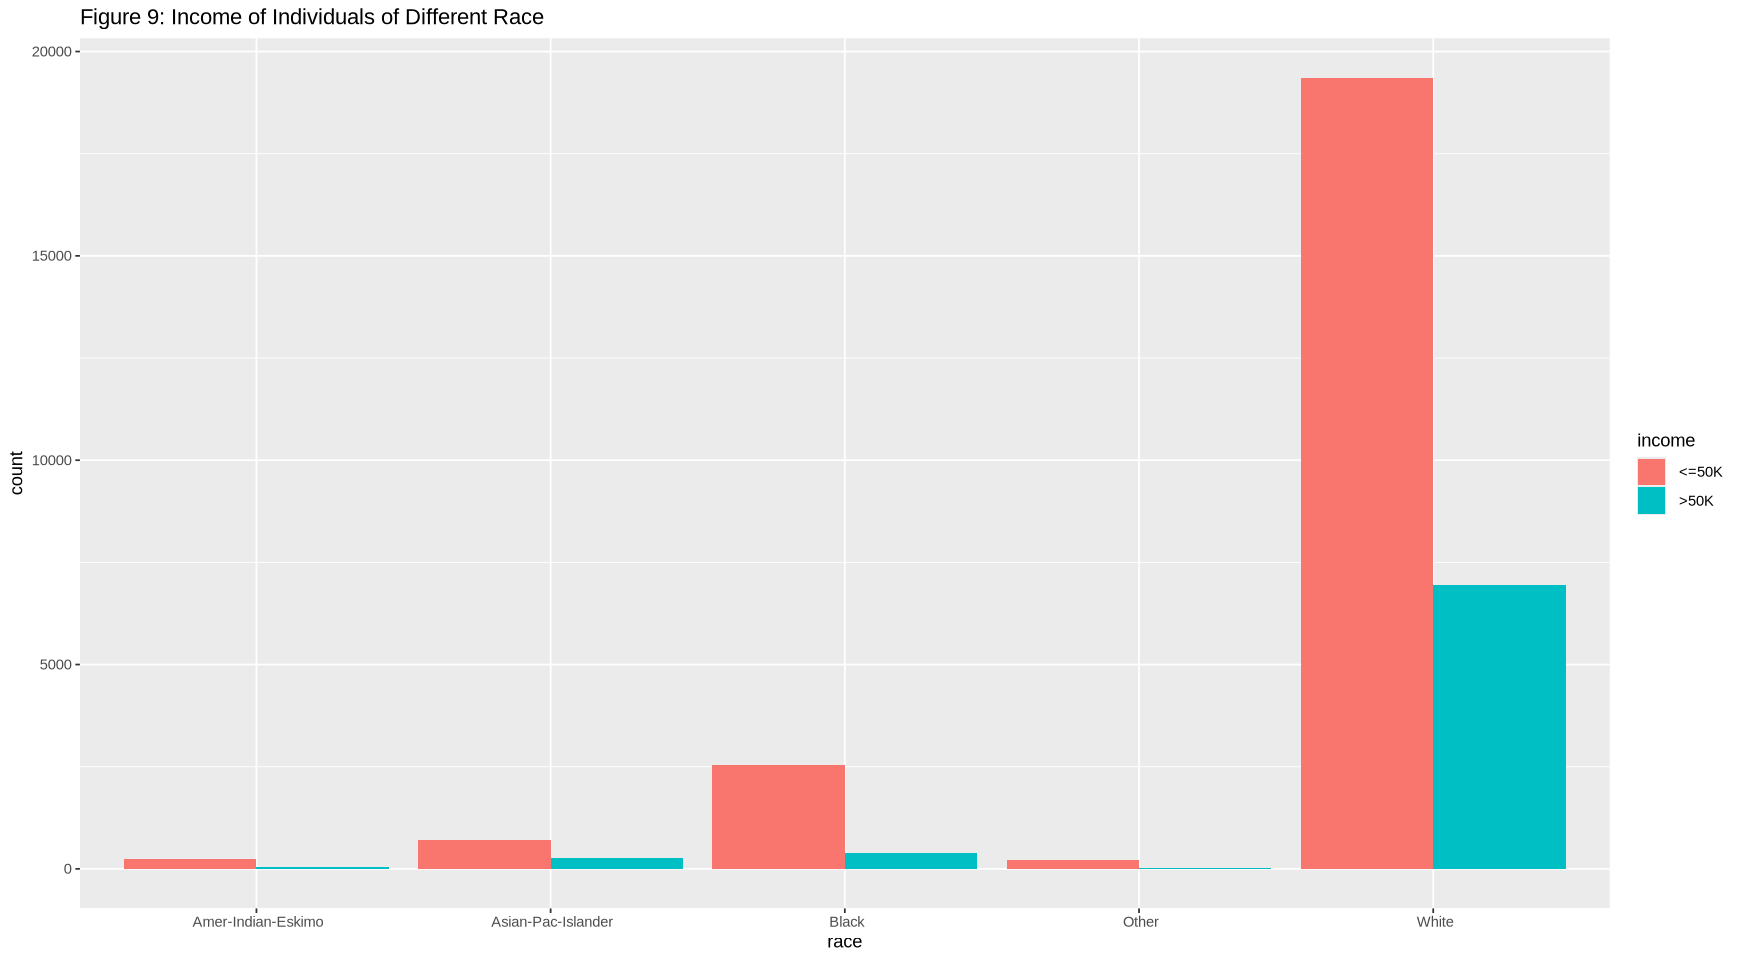

In [18]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(race,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 9: Income of Individuals of Different Race")

The class distribution in the race category is very imbalanced. A large majority of the sample is `White`, but there is not a significant visible difference in the incomes within each race in this plot.

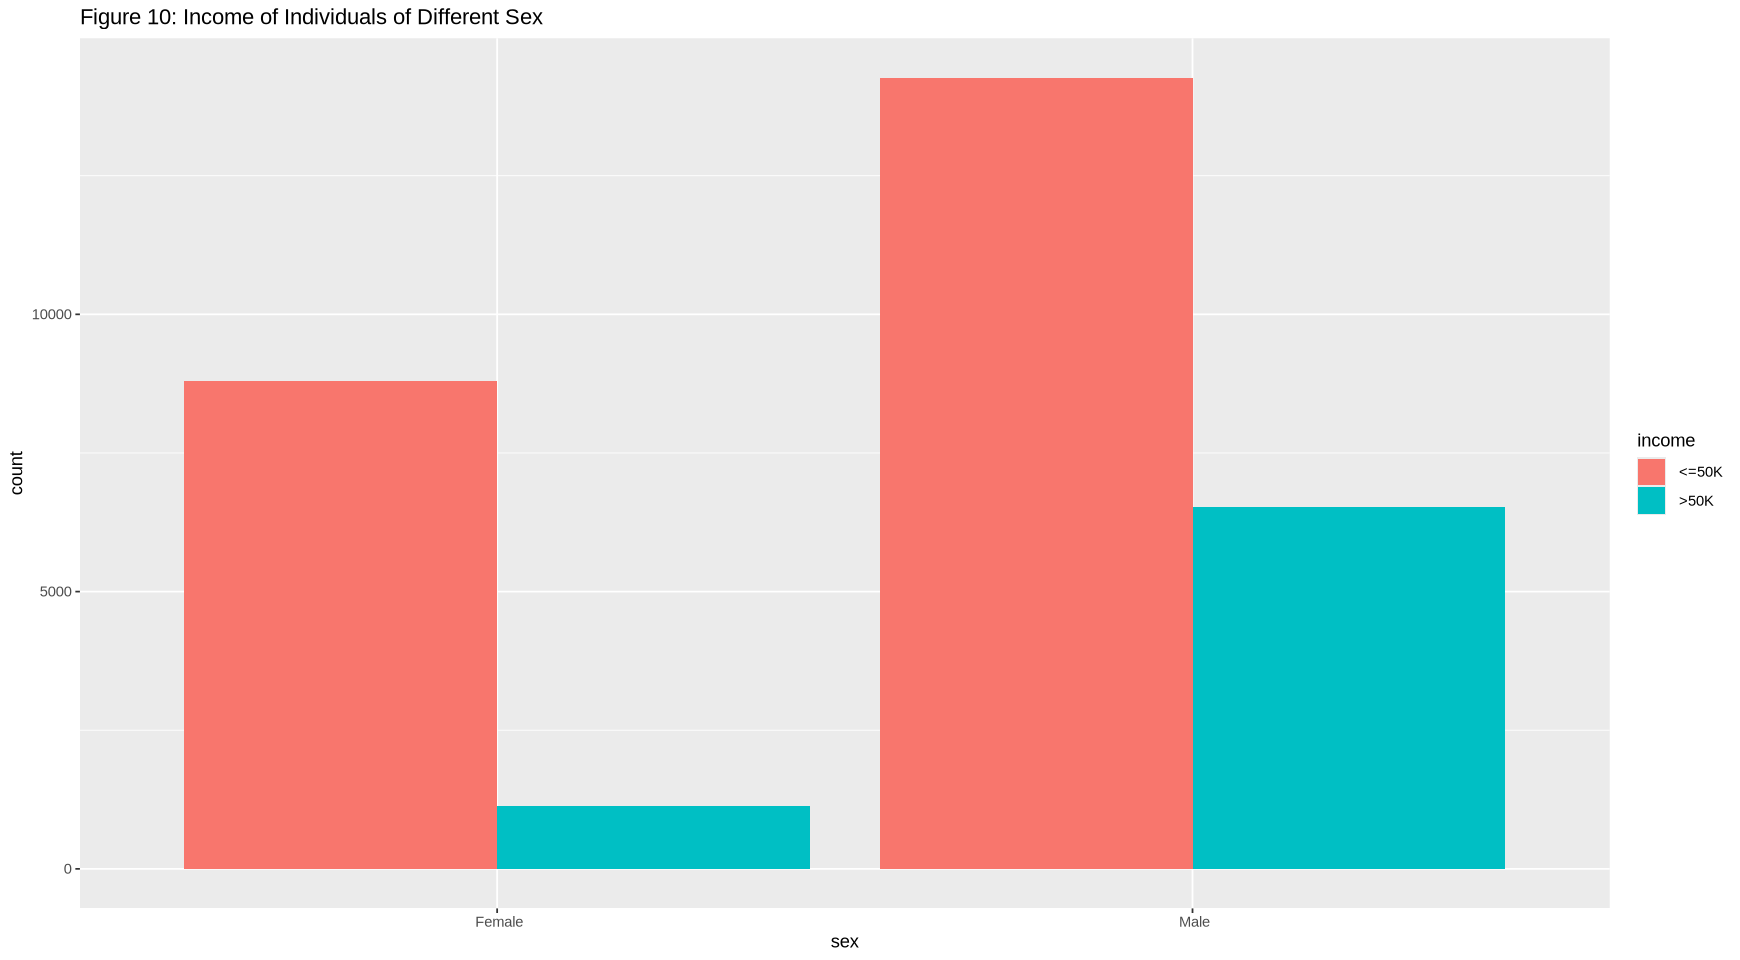

In [19]:
#Main Developer: Jorge Punter Piquer
ggplot(adult_train,aes(sex,fill=income))+
geom_bar(position='dodge')+ 
ggtitle("Figure 10: Income of Individuals of Different Sex")

As discussed above, there are twice as many `Male` people than `Female` in our dataset. From here, we see that around a third of males make more than 50k, compared to a very small proportion of females.

### b) Methods: Plan

We will expand the question a little bit by also trying to get a reasonably good predictive model.
For the question, the best model we can use to answer it is a logistic regression model, because it models the conditinal probability given a set of covariates. This model will also allow us to make inference and know if there is a relation between sex, education level, occupation and wheter or not that individual earns more than 50K a year, and also make predictions.

The assumptions needed in order to use a logistic regression are:

- **Binary Response**. The response variable is dichotomous (two possible responses) or the sum of dichotomous responses.
- **Independence**. The observations must be independent of one another.
- **Variance Structure**. By definition, the variance of a binomial random variable is $np(1-p) $.
- **Linearity**. The log of the odds ratio, $ \log( \frac{p}{1−p}) $, must be a linear function of  the covariates.

In order to select the variables for the logistic regression model, we will use LASSO and then fit a logistic regression with those variables.
Some of the assumptions of the LASSO Model are:

- LASSO regression assumes linarity between predictors and response variable.

- Predictos are standardized with z-score.
  
- Each observations should be independent from each other.

- Errors are normally distributated with constant variance.

- Sample size is sufficient relative to the number of predictors.

And one potential downside is that it is computationally expensive which may not suitable for large dataset.

We will also use the education numerical variable insted of the categorical one to aim for a more simple model, with the tradeoff of possible worse fitting, because when the numerical one in the logistic regression the coefficients for the different education levels would be a multiple of the coefficient that multiplies the `education_num` variable , and therefore they would constrained. On the other hand, if we took the categorical one, the resulting model would have more coefficients. 

#### Implementation of a proposed model

Let us check for multicollinearity with the full (additive) logistic model.

In [ ]:
# Main developer: Jorge Punter Piquer
base_log_model=glm(formula=income~.,
       data=adult_train %>% select(-education_num),
       family="binomial")
vif(base_log_model)

In this case, as we have categorical variables with many factors, we get GVIF instead of VIF. GVIF was introduced by Monette and Fox in the paper "Generalized collinearity diagnostics," JASA 87:178-183, 1992 [link here](https://www.tandfonline.com/doi/abs/10.1080/01621459.1992.10475190).
We see that, as a rule of thumb, a value of $\text{GVIF}^{\frac{1}{2 \cdot Df}}$ higher than $\sqrt{5} = 2.23$ is of concern. As we see, all values are below this threshold, so we do not modify the variables.

Let us compute the matrix model to use the  LASSO aproach to select variables.

In [ ]:
# Main developer: Jorge Punter Piquer
X_train = model.matrix(object = income~age+workclass+occupation+relationship+fnlwgt+education_num+marital_status+race+sex+hours_per_week, 
                       data = adult_train)[,-1]
X_test = model.matrix(object = income~age+workclass+occupation+relationship+fnlwgt+education_num+marital_status+race+sex+hours_per_week, 
                      data = adult_test)[,-1]
head(X_train)

### Feature Selection

In [ ]:
# Main developer: Jorge Punter Piquer
# Contributor: Yiting Sun
lasso_model <-
     cv.glmnet(x = X_train , 
               y = adult_train %>% select(income) %>% as.matrix() , 
               alpha = 1,
               family = "binomial",
               type.measure = "class",
               nfolds = 10)
lasso_model

In [ ]:
# Main developer: Jorge Punter Piquer
# Contributor: Yiting Sun
plot(lasso_model, main = "Misclassification Error for lambda values")
grid()

We now look at the coefficients of the lasso with minium misclassification error on average

In [ ]:
# Main developer: Jorge Punter Piquer
# Contributor: Yiting Sun
beta_lasso1 <- coef(lasso_model, s = lasso_model$lambda.min)
beta_lasso1

Only a few variables were nullified, lets try to get lambda values between $\exp(-5)$ and $\exp(-3)$

In [ ]:
# Main developer: Jorge Punter Piquer
lasso_min_binary_models <-
     glmnet(x = X_train , 
            y = adult_train %>% select(income) %>% as.matrix() , 
            alpha = 1,
            family = "binomial",
            lambda = exp(seq(-5,-3,0.1)))
lasso_min_binary_models

In [ ]:
# Main developer: Jorge Punter Piquer
plot(lasso_model$glmnet.fit, "lambda",ylim=c(-1,1), main="LASSO Coefficient shrinkage")

We select  $\lambda=\exp(-3.6)$ because it gives a more or less acceptable misclassification error and it nullifies many variables, as seen in the plots.

In [ ]:
# Main developer: Jorge Punter Piquer
beta_lasso <- coef(lasso_model, s = exp(-3.6))
beta_lasso

Let us join the levels of the factors that were nullified in the lasso model.

In [ ]:
# Main developer: Jorge Punter Piquer
adult_train_joined = adult_train %>% mutate( 
                       marital_status = fct_collapse(marital_status, Not_Married_civ_spouse = c(" Divorced", " Married-AF-spouse", " Married-spouse-absent", " Married-spouse-absent", " Never-married", " Separated", " Widowed")),
                       occupation = fct_collapse(occupation, Not_Exec_managerial_or_Prof_specialty=c(" Adm-clerical", " Armed-Forces", " Craft-repair", " Farming-fishing", " Handlers-cleaners", " Machine-op-inspct", " Other-service", " Priv-house-serv", " Protective-serv", " Sales", " Tech-support", " Transport-moving")))
adult_test_joined = adult_test %>%   mutate(
                       marital_status = fct_collapse(marital_status,Not_Married_civ_spouse=c(" Divorced", " Married-AF-spouse", " Married-spouse-absent", " Married-spouse-absent", " Never-married", " Separated", " Widowed")),
                       occupation = fct_collapse(occupation, Not_Exec_managerial_or_Prof_specialty=c(" Adm-clerical", " Armed-Forces", " Craft-repair", " Farming-fishing", " Handlers-cleaners", " Machine-op-inspct", " Other-service", " Priv-house-serv", " Protective-serv", " Sales", " Tech-support", " Transport-moving")))
head(adult_train_joined)

Now let us fit the model with the variables lasso has selected.

In [ ]:
# Main developer: Jorge Punter Piquer
# Contributor: Yiting Sun, Jiahao Li
binary_log_model <- 
   glm(formula = income~age + occupation + education_num + marital_status + hours_per_week,
       data = adult_train_joined,
       family = "binomial")
summary(binary_log_model)

We see that age, occupation, education, marital_status and hours per week are statistically significant, based on the lasso selection, answering the first part of our question.

Now we compute the confusion matrix to discover the goodnes of fit of the prediction model in the test set.

In [ ]:
# Main developer: Jorge Punter Piquer
# Contributor: Yiting Sun
confusion_matrix1 <- 
     confusionMatrix(data = as.factor(if_else(predict(binary_log_model,adult_test_joined, type="response")>0.5, " >50K.", " <=50K.")),
     reference = adult_test_joined$income,
     positive = " >50K.")
confusion_matrix1
paste("AUC:",
      round(auc(response = adult_test_joined$income,
      predictor = predict(binary_log_model,adult_test_joined, type="response")),3))

## Discussion

The model achieved an overall accuracy of 82.31%, which is significantly higher than the no-information rate (NIR) of 75.37%. This suggests that the model is performing well in predicting whether an individual's income exceeds $\$50$K based on the available features. With a specificity of 92.17%, the model performs particularly well in predicting individuals' income ≤ $\$50$ since it correctly identifies 92.17% of those in this income group. However, the sensitivity is 52.15%, it indicates that just over half of those with income >$\$50$K are identified correctly. The positive prediction value is 68.51%, while the negative prediction value is 85.5%, showing the model is more confident in predicting lower-income individuals than higher-income ones. The balanced accuracy is 72.16%, along with a Kappa statistic of 0.4819, indicates moderate agreement between predictions and actual outcomes.


These results suggest the model is reliable for identifying individuals earning ≤$\$50$K but less effective for those earning >$\$50$K, potentially limiting its usefulness for applications focused on identifying higher-income individuals.

The results were partially aligned with expectations but revealed areas of underperformance that warrant further investigation. While the model performs well for the majority class, the low sensitivity for the >$50K group was somewhat unexpected and highlights the need for targeted improvements to better address the research question. We could change this value if we want by changing the threshold used to predict the classes (in this case we used 0.5). If we use a lower value, we will get more sensitivity and less specificity.

To improve this prediction model, considering adding interactions between variables or other non-linear terms to capture more complex relationships could increase the model's accuracy and predictive power. Furthermore, we can perform non-linear transformations for continuous variables (e.g., age, hours per week) to allow for more flexible decision boundaries. In addition, using alternative feature selection methods can improve the model by identifying the most relevant predictors and potentially capturing relationships that LASSO may overlook. Instead of using LASSO regression only, we can incorporate and explore other methods such as stepwise selection (eg. forward selection, backward selection), or recursive feature elimination, etc. 

This study could lead to several future research. One could explore how the relationships between income and predictors such as education, occupation, or hours worked vary across demographic groups like gender, race, or geographic region. Examining these differences could help uncover inequities and inform targeted interventions. Additionally, analyzing longitudinal data to track individuals’ income trajectories over time could provide insights into economic mobility and the long-term effects of education or policy changes. Finally, incorporating external factors like regional economic conditions or industry trends could enhance the model’s predictive power and offer a broader understanding of income inequality.

## References

Ahrenfeldt, L. J., Pedersen, J. K., Thinggaard, M., Christensen, K., & Lindahl-Jacobsen, R. (2019). Sex differences in health and mortality by income and income changes. Journal of Epidemiology and Community Health, 74(3), 225–231. https://doi.org/10.1136/jech-2019-213096

Kochhar, R., & Moslimani, M. (2023, December 4). Wealth gaps across racial and ethnic groups. Pew Research Center. https://www.pewresearch.org/2023/12/04/wealth-gaps-across-racial-and-ethnic-groups/